In [35]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import gmaps
import matplotlib.pyplot as plt
from config import google_api_key
gmaps.configure(api_key=google_api_key)

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])
sa_postcodes_df = pd.read_csv(sa_postcodes)

In [2]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [3]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [4]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [5]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [6]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [7]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [8]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [9]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [10]:
#review updated dataframe
crime_postcode_merge_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227842,2020-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,15588.0,SA,138.565224,...,403041084.0,Morphett Vale - East,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
227843,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227844,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227845,2020-12-31,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13720.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0


In [11]:
#drop unnecessary columns
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4'])

In [12]:
#create new cleaner dataframe by isolating only 2019 & 2020 SA data
crimes_2019_2020_df = crime_postcode_merge_df.loc[(crime_postcode_merge_df["Reported Date"] >= "2019-01-01") & (crime_postcode_merge_df["Reported Date"] <= "2020-12-31") & (crime_postcode_merge_df["state"] == "SA")]

In [13]:
#send new cleaner dataframe to csv
crimes_2019_2020_df.to_csv('crimedata.csv', index=False)

In [104]:
#split new cleaner dataframe into separate 2019 & 2020 dataframes
crimes_2019_df = crimes_2019_2020_df.loc[(crimes_2019_2020_df["Reported Date"] <= "2019-12-31")]
crimes_2020_df = crimes_2019_2020_df.loc[(crimes_2019_2020_df["Reported Date"] >= "2020-01-01")]

In [112]:
crimes_2019_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,state,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,4.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143816,2019-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1.0,SA,138.565224,-35.112119,LONSDALE DC,Onkaparinga,Adelaide - South,R2,-35.118261,138.543736,Morphett Vale - East,Onkaparinga,Adelaide - South
143817,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143818,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143819,2019-12-31,WOODVILLE GARDENS,5012,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0,SA,138.541637,-34.863030,REGENCY PARK DC,Port Adelaide - West,Adelaide - West,R2,-34.864000,138.552000,The Parks,Port Adelaide - West,Adelaide - West


In [15]:
#group new dataframes by suburbs
crimes2019_by_region4_df = crimes_2019_df.groupby(['Suburb - Incident'])
crimes2020_by_region4_df = crimes_2020_df.groupby(['Suburb - Incident'])

In [16]:
#sanity check new dataframes by suburbs
crimes2019_by_region4_df.count().head()

,Reported Date,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,state,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
Suburb - Incident,,,,,,,,,,,,,,,,,,
ABERFOYLE PARK,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248
ADELAIDE,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952,2952
ADELAIDE AIRPORT,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142,142
AGERY,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
ALBERT PARK,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90


In [121]:
# Plot 2019 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations2019 = crimes_2019_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity2019 = crimes_2019_df["Offence count"]
#max_crimes = crimes_2019_df["Offence count"].max()

# Create heat layer
heat_layer2019 = gmaps.heatmap_layer(locations2019, weights=humidity2019, 
                                 dissipating=False, max_intensity=6707,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer2019)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [116]:
crimes_2019_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,state,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,4.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143816,2019-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1.0,SA,138.565224,-35.112119,LONSDALE DC,Onkaparinga,Adelaide - South,R2,-35.118261,138.543736,Morphett Vale - East,Onkaparinga,Adelaide - South
143817,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143818,2019-12-31,WOODFORDE,5072,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,SA,138.696113,-34.912078,GLYNDE DC,Campbelltown (SA),Adelaide - Central and Hills,R2,-34.906330,138.711614,Uraidla - Summertown,Adelaide Hills,Adelaide - Central and Hills
143819,2019-12-31,WOODVILLE GARDENS,5012,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0,SA,138.541637,-34.863030,REGENCY PARK DC,Port Adelaide - West,Adelaide - West,R2,-34.864000,138.552000,The Parks,Port Adelaide - West,Adelaide - West


In [122]:
# Plot 2020 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations = crimes_2020_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity = crimes_2020_df["Offence count"]
#max_crimes = crimes_2020_df["Offence count"].max()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=6707,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [103]:
#Code not working to break regions for heatmapping
#regions = ["Adelaide - Central and Hills","Adelaide - North","Adelaide - South", "Adelaide - West"]

#adelaide_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["SA4_NAME_2016"] == regions),:]

<b> Crimes by Region</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [31]:
#Create count for crimes per region
region_crime_2019 = crimes2019_by_region4_df["Offence count"].sum()
region_crime_2020 = crimes2020_by_region4_df["Offence count"].sum()

In [32]:
#check 2019 regional figures
region_crime_2019

sa4name
Adelaide - Central and Hills    14414.0
Adelaide - North                33872.0
Adelaide - South                19524.0
Adelaide - West                 24168.0
Barossa - Yorke - Mid North      7066.0
Northern Territory - Outback      316.0
South Australia - Outback        7475.0
South Australia - South East     8844.0
Name: Offence count, dtype: float64

In [33]:
#check 2020 regional figures
region_crime_2020

sa4name
Adelaide - Central and Hills    12712.0
Adelaide - North                29223.0
Adelaide - South                16596.0
Adelaide - West                 19377.0
Barossa - Yorke - Mid North      6279.0
Northern Territory - Outback      280.0
South Australia - Outback        7203.0
South Australia - South East     7999.0
Name: Offence count, dtype: float64

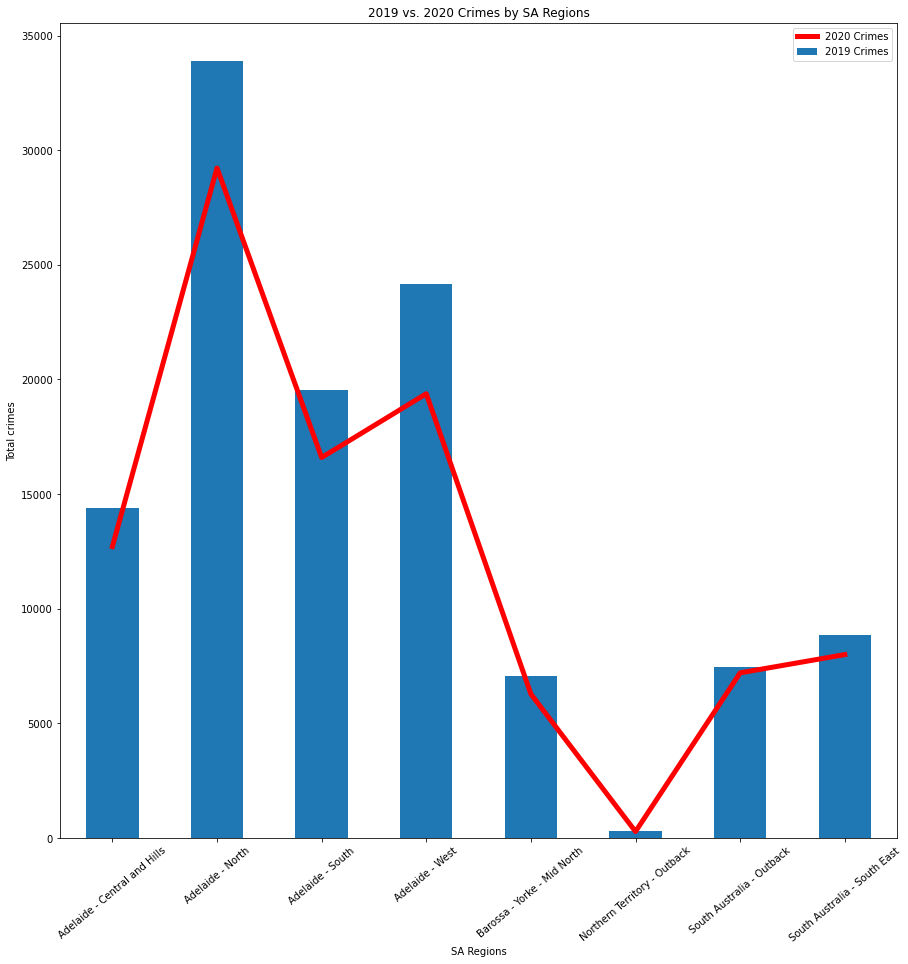

In [51]:
#create 2019 v 2020 bar/line plt 
region_crime_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', figsize = (15, 15), label='2019 Crimes')
region_crime_2020.plot(x = 'Reported Date', y = 'Offence count', color ='red', label='2020 Crimes', linewidth=5)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes")
plt.xlabel("SA Regions")
plt.title("2019 vs. 2020 Crimes by SA Regions")
plt.show()

<b> Personal Crimes by Region & Crime Type Data</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [52]:
#split each dataframe by crime type and regional
crimes2019_by_region4_type_df = crimes_2019_df.groupby(['sa4name', 'Offence Level 1 Description'])
crimes2020_by_region4_type_df = crimes_2020_df.groupby(['sa4name', 'Offence Level 1 Description'])

In [160]:
#define new dataframes for personal/property crimes for each year
property_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["Offence Level 1 Description"] == "OFFENCES AGAINST PROPERTY")]
personal_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["Offence Level 1 Description"] == "OFFENCES AGAINST THE PERSON")]
property_crimes_2020_df = crimes_2020_df.loc[(crimes_2020_df["Offence Level 1 Description"] == "OFFENCES AGAINST PROPERTY")]
personal_crimes_2020_df = crimes_2020_df.loc[(crimes_2020_df["Offence Level 1 Description"] == "OFFENCES AGAINST THE PERSON")]

<b> Personal Crimes by Crime Type Data</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [166]:
#define new dataframes for personal crimes for crime type
personal_crimes_breakdown_2019_df = personal_crimes_2019_df.groupby(['Offence Level 2 Description'])
personal_crimes_breakdown_2020_df = personal_crimes_2020_df.groupby(['Offence Level 2 Description'])

In [168]:
#add sum for each new dataframe to plot
crimes_by_type_2019 = personal_crimes_breakdown_2019_df["Offence count"].sum()
crimes_by_type_2020 = personal_crimes_breakdown_2020_df["Offence count"].sum()

<b> Acts Intended to cause injury review </b>

* Outlining new dataframes 
* Adding sums for future plotting

In [175]:
injury_crimes_2019_df = crimes_2019_df.loc[(crimes_2019_df["Offence Level 2 Description"] == "ACTS INTENDED TO CAUSE INJURY")]
injury_crimes_2020_df = crimes_2020_df.loc[(crimes_2020_df["Offence Level 2 Description"] == "ACTS INTENDED TO CAUSE INJURY")]

In [179]:
#define new dataframes for injury crimes for each year
injury_crimes_2019_grouped_df = injury_crimes_2019_df.groupby(['Offence Level 3 Description'])
injury_crimes_2020_grouped_df = injury_crimes_2020_df.groupby(['Offence Level 3 Description'])

In [184]:
#add sum for each new dataframe to plot
injurycrimes_2019 = injury_crimes_2019_grouped_df["Offence count"].sum()
injurycrimes_2020 = injury_crimes_2020_grouped_df["Offence count"].sum()

<b> Crimes Types by Region</b>

* Outlining new dataframes 
* Adding sums for future plotting

In [63]:
#group new dataframes by region
property_crimes_2019_region_df = property_crimes_2019_df.groupby(['sa4name'])
property_crimes_2020_region_df = property_crimes_2020_df.groupby(['sa4name'])
personal_crimes_2019_region_df = personal_crimes_2019_df.groupby(['sa4name'])
personal_crimes_2020_region_df = personal_crimes_2020_df.groupby(['sa4name'])

In [67]:
#add sum for each new dataframe to plot
region_crime_property_2019 = property_crimes_2019_region_df["Offence count"].sum()
region_crime_person_2019 = personal_crimes_2019_region_df["Offence count"].sum()
region_crime_property_2020 = property_crimes_2020_region_df["Offence count"].sum()
region_crime_person_2020 = personal_crimes_2020_region_df["Offence count"].sum()

<b>Bar/Line Graphs comparing rates of Property Crimes by Region, then Personal Crimes by Region</b>


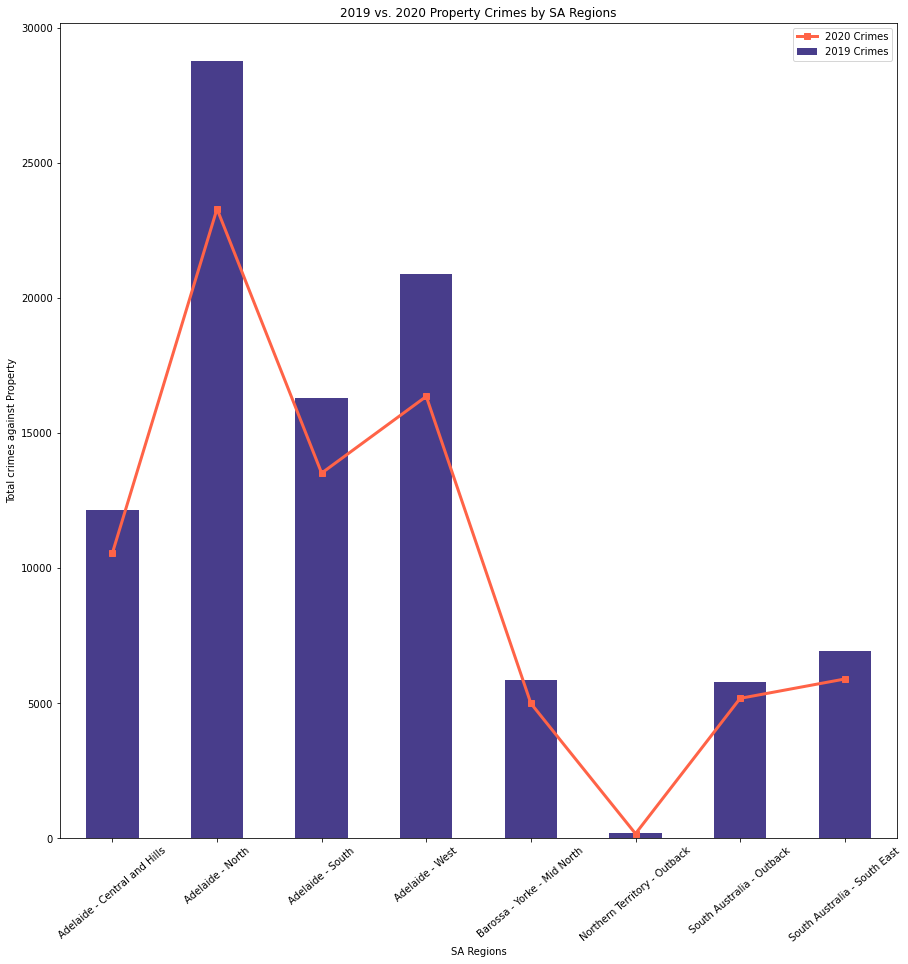

In [101]:
#create 2019 v 2020 comparison for property crimes
region_crime_property_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color = 'darkslateblue',figsize = (15, 15), label='2019 Crimes')
region_crime_property_2020.plot(x = 'Reported Date', y = 'Offence count', color ='tomato', label='2020 Crimes', marker='s', markeredgecolor='tomato', markerfacecolor='tomato', linewidth=3)
plt.xticks(rotation=40)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Property")
plt.xlabel("SA Regions")
plt.title("2019 vs. 2020 Property Crimes by SA Regions")
plt.show()

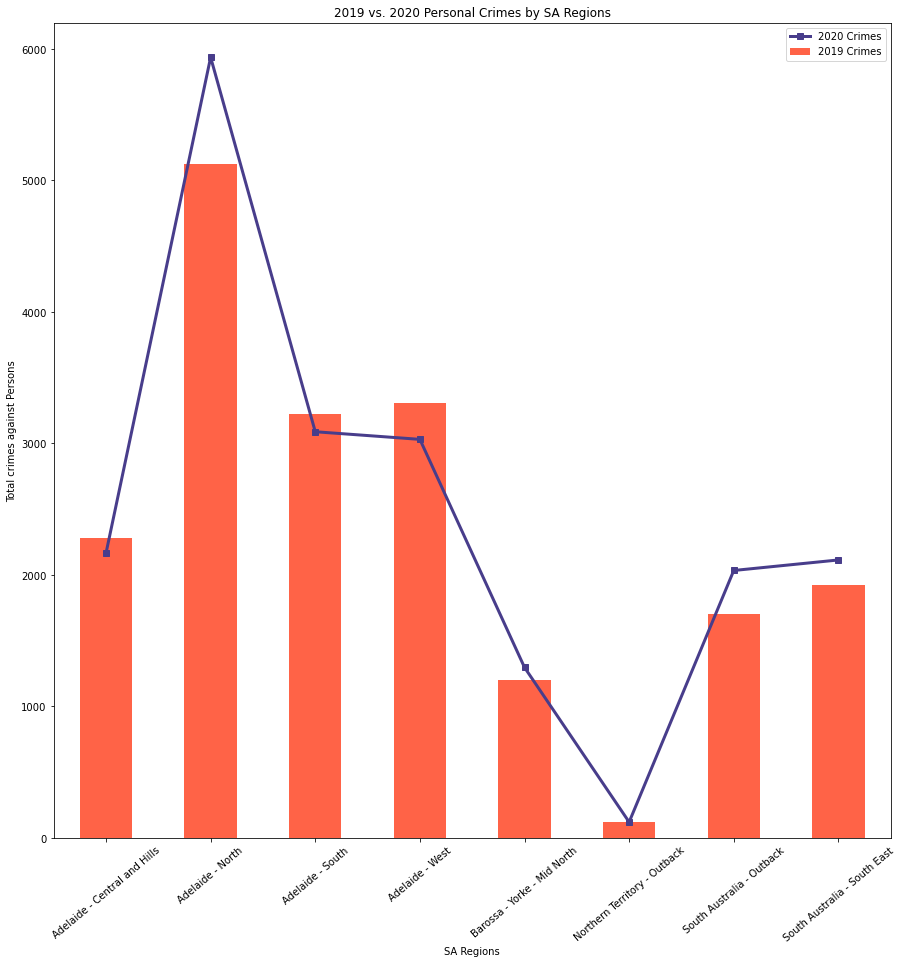

In [102]:
#create 2019 v 2020 comparison for personal crimes 
region_crime_person_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='tomato', figsize = (15, 15), label='2019 Crimes')
region_crime_person_2020.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Persons")
plt.ylim(0,6200)
plt.xlabel("SA Regions")
plt.title("2019 vs. 2020 Personal Crimes by SA Regions")
plt.show()

In [120]:
# Plot 2019 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations2019 = personal_crimes_2019_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity2019 = personal_crimes_2019_df["Offence count"]
#max_crimes = crimes_2019_df["Offence count"].max()

# Create heat layer
heat_layer2019 = gmaps.heatmap_layer(locations2019, weights=humidity2019, 
                                 dissipating=False, max_intensity=1384,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer2019)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [123]:
# Plot 2019 Heatmap
fig = gmaps.figure(map_type='HYBRID', center=(-32, 134.75516), zoom_level=5)

# Store latitude and longitude in locations
locations2020 = personal_crimes_2020_df[["lat", "long"]]

# Fill NaN values and convert to float
humidity2020 = personal_crimes_2020_df["Offence count"]
#max_crimes = crimes_2019_df["Offence count"].max()

# Create heat layer
heat_layer2020 = gmaps.heatmap_layer(locations2020, weights=humidity2020, 
                                 dissipating=False, max_intensity=1384,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer2020)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [129]:
#group new dataframes by offence type
crimes_by_type_2019_df = crimes_2019_df.groupby(['Offence Level 1 Description'])
crimes_by_type_2020_df = crimes_2020_df.groupby(['Offence Level 1 Description'])

In [157]:
#create value count for 
crime_count_2019 = crimes_by_type_2019_df["Offence count"].sum()
crime_count_2020 = crimes_by_type_2020_df["Offence count"].sum()
crime_count_2019

Offence Level 1 Description
OFFENCES AGAINST PROPERTY      96786.0
OFFENCES AGAINST THE PERSON    18897.0
Name: Offence count, dtype: float64

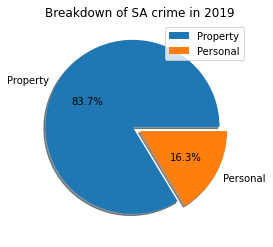

In [156]:
# Generate a pie plot showing the distribution of property vs personal crimes in 2019
labels = ["Property","Personal"]

# The values of each section of the pie chart
crime2019 = crime_count_2019

# The colors of each section of the pie chart
colors = ["#1f77b4","#ff7f0e"]

plt.pie(crime2019, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, explode = [0.1, 0])
plt.legend()
plt.title("Breakdown of SA crime in 2019")
plt.show()

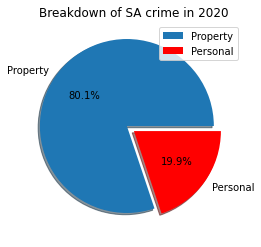

In [158]:
# Generate a pie plot showing the distribution of property vs personal crimes in 2020
labels = ["Property","Personal"]

# The values of each section of the pie chart
crime2020 = crime_count_2020

# The colors of each section of the pie chart
colors = ["#1f77b4","red"]

plt.pie(crime2020, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, explode = [0.1, 0])
plt.legend()
plt.title("Breakdown of SA crime in 2020")
plt.show()

<b> Bar/Line Chart looking at Personal Crimes by Type

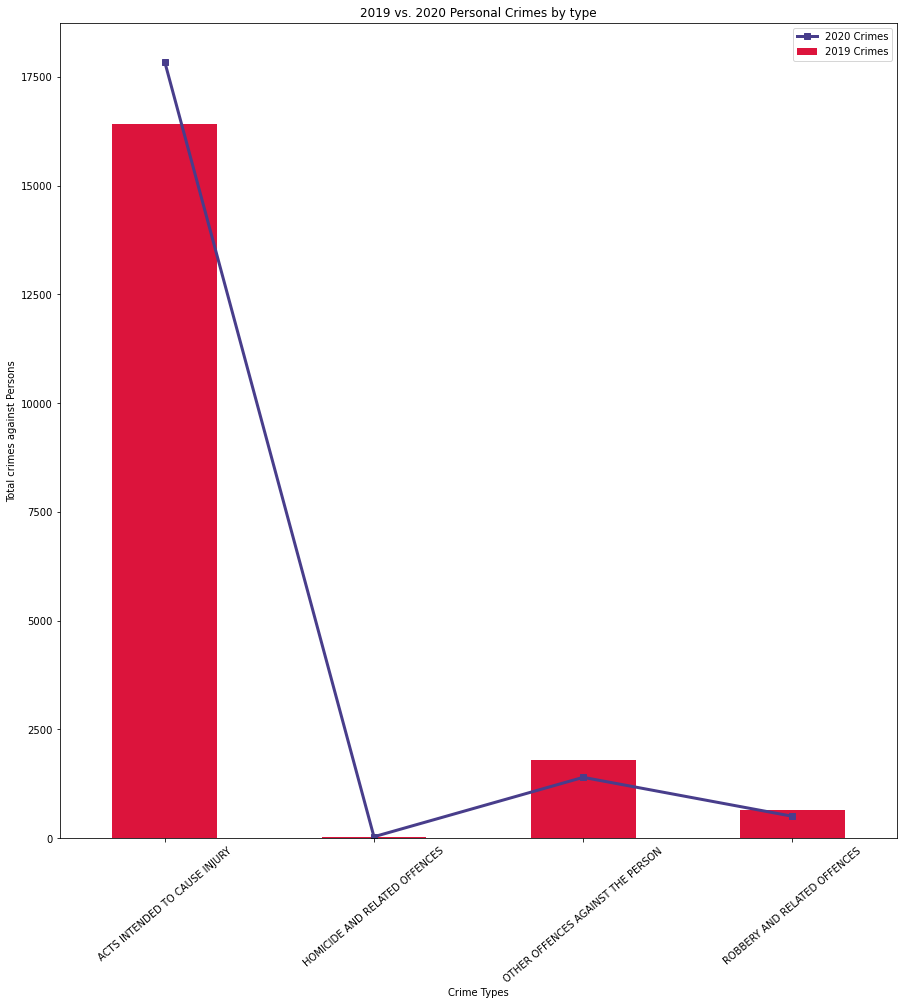

In [173]:
#create 2019 v 2020 breakdown for personal crimes 
crimes_by_type_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='crimson', figsize = (15, 15), label='2019 Crimes')
crimes_by_type_2020.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='darkslateblue', marker='s', markeredgecolor='darkslateblue', markerfacecolor='darkslateblue', linewidth=3)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Persons")
plt.xlabel("Crime Types")
plt.title("2019 vs. 2020 Personal Crimes by type")
plt.show()

<b>Bar/Line & Pie Charts looking at Acts intended to cause injury

In [ ]:
injurycrimes_2019 = injury_crimes_2019_grouped_df["Offence count"].sum()
injurycrimes_2020 = injury_crimes_2020_grouped_df["Offence count"].sum()

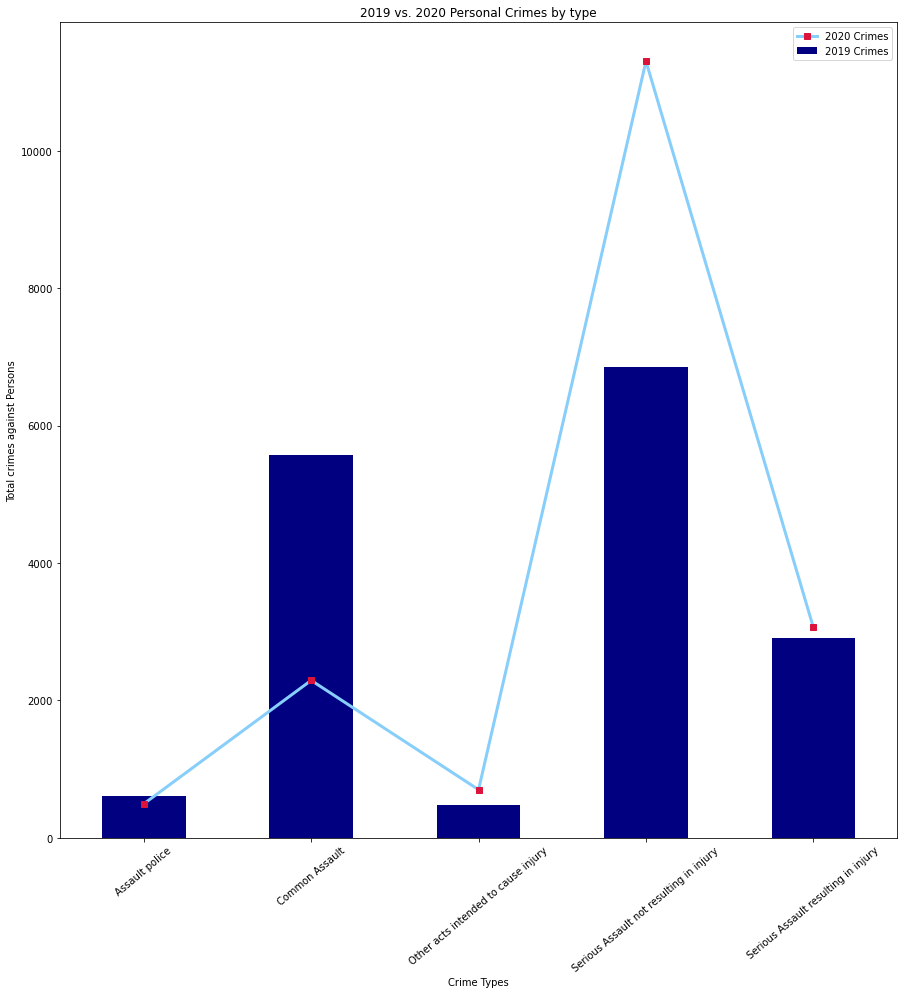

In [187]:
#create 2019 v 2020 breakdown for personal crimes 
injurycrimes_2019.plot(kind = 'bar', x = 'Reported Date', y = 'Offence count', color ='navy', figsize = (15, 15), label='2019 Crimes')
injurycrimes_2020.plot(x = 'Reported Date', y = 'Offence count', label='2020 Crimes', color ='lightskyblue', marker='s', markeredgecolor='crimson', markerfacecolor='crimson', linewidth=3)
plt.xticks(rotation=40)
plt.legend()
plt.ylabel("Total crimes against Persons")
plt.xlabel("Crime Types")
plt.title("2019 vs. 2020 Personal Crimes by type")
plt.show()

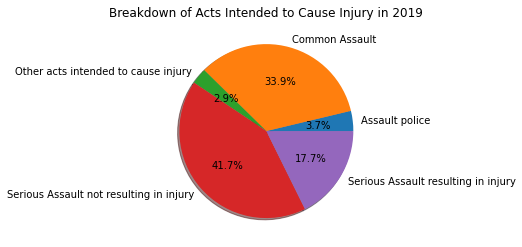

In [197]:
#set labels
labels = injurycrimes_2019.index

#generate plot
plt.pie(injurycrimes_2019, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Breakdown of Acts Intended to Cause Injury in 2019")
plt.show()

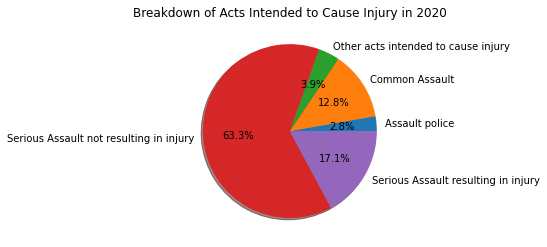

In [195]:
#set labels
labels = injurycrimes_2020.index

#generate plot
plt.pie(injurycrimes_2020, labels=labels, autopct="%1.1f%%", shadow=True)
plt.title("Breakdown of Acts Intended to Cause Injury in 2020")
plt.show()